1. [Libraries and Imports](#1)
2. [Statistics](#2)
3. [aa](#3)
4. [bb](#4)
5. [cc](#5)

In [1]:
### Libraries and Imports

In [2]:
# base 
import os 
import sys
from src import helpers, config, plotting, evaluation
import random 
import json 
import numpy as np
import pandas as pd 
import pandas.api.types as types
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
import pickle
from pathlib import Path
from typing import List, Set, Dict, Tuple
from typing import Union, Any, Optional, Iterable, Hashable, Type

# base
from sklearn.base import TransformerMixin

# ml preprocessing 
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, MinMaxScaler

# models
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression

# validation 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_validate, KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, roc_auc_score, precision_score, recall_score, plot_confusion_matrix

# pipelines 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.metrics import make_scorer

# ignore warnings 
import warnings 
warnings.filterwarnings('ignore')

from sklearn import set_config
set_config(display='diagram')

# yet to arrange
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
assert config.TRAIN_FILE_PATH == Path.cwd().parent / "data" / "final"
assert config.REPORTS_PATH == Path.cwd().parent / "reports" / "figures"
assert config.RAW_FILE_PATH == Path.cwd().parent / "data" / "raw"

In [4]:
# set the target column
%matplotlib inline 

sns.set_style('white')
sns.set_palette('deep')
mpl.rcParams['figure.figsize'] = config.DEFAULT_FIGSIZE
mpl.rcParams['lines.linewidth'] = config.DEFAULT_PLOT_LINEWIDTH
mpl.rcParams['lines.linestyle'] = config.DEFAULT_PLOT_LINESTYLE
mpl.rcParams['font.size'] = config.DEFAULT_AXIS_FONT_SIZE

TARGET = 'status'
df = pd.read_parquet(config.ROOT_DIR / 'data' / 'interim' / 'df.parquet')

### Missingness


    NUMBER OF MISSING COLUMNS: 144496
    MISSING COLUMNS (0: NO MISSING VALUES, 1: MISSING VALUES) 
    loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
occupancy_type                   0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co_applicant_credit_type         0
age                            200
submission_of_application      200
ltv                          15098
region             

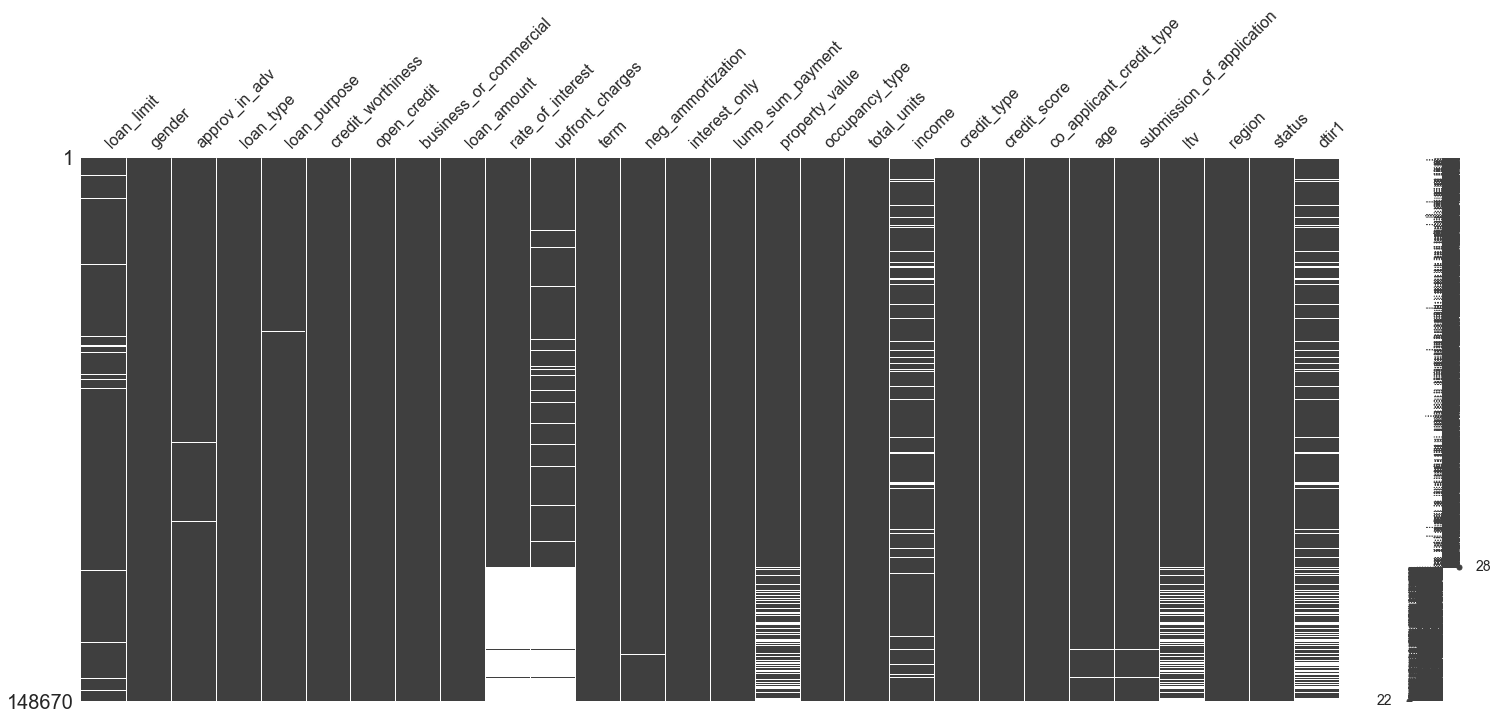

MISSINGNESS CORRELATIONS


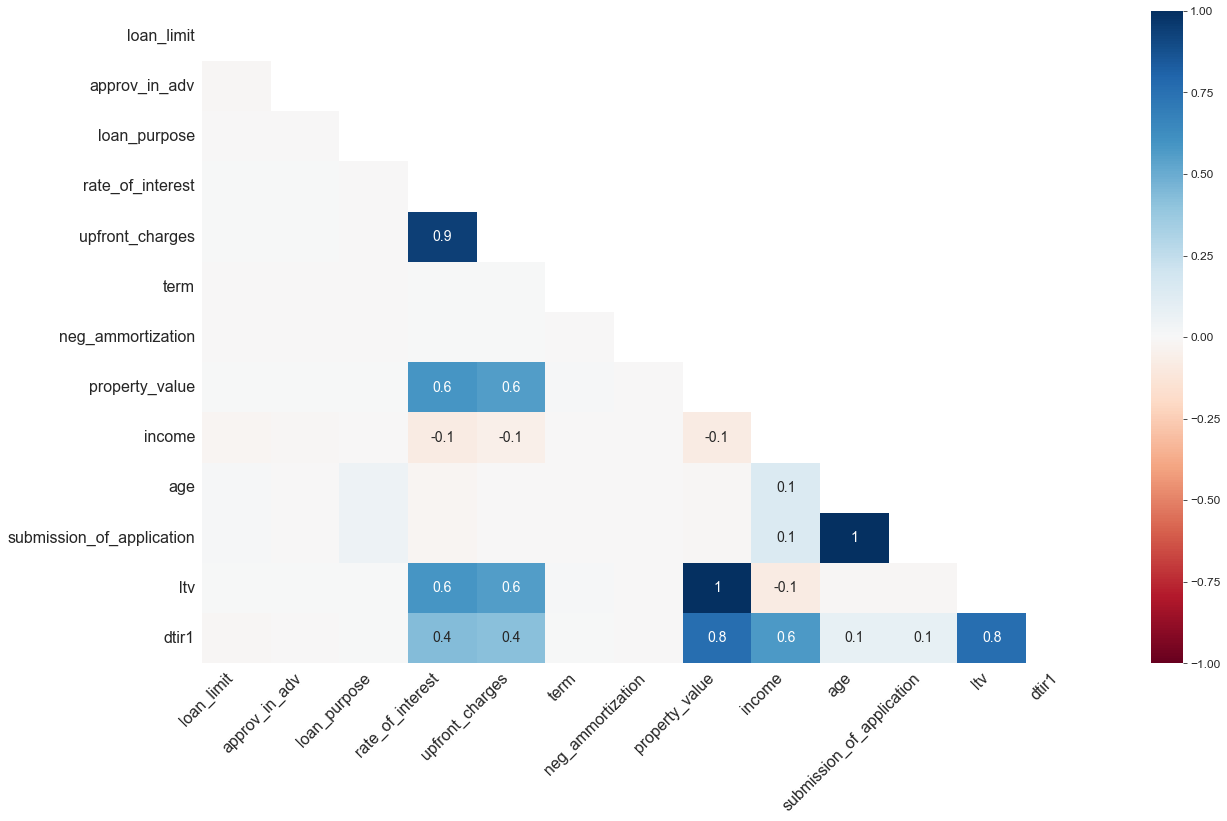

In [5]:
helpers.missingness_checks(df.sort_values(by='status'))

### Overview of Data

TypeError: No loop matching the specified signature and casting was found for ufunc add

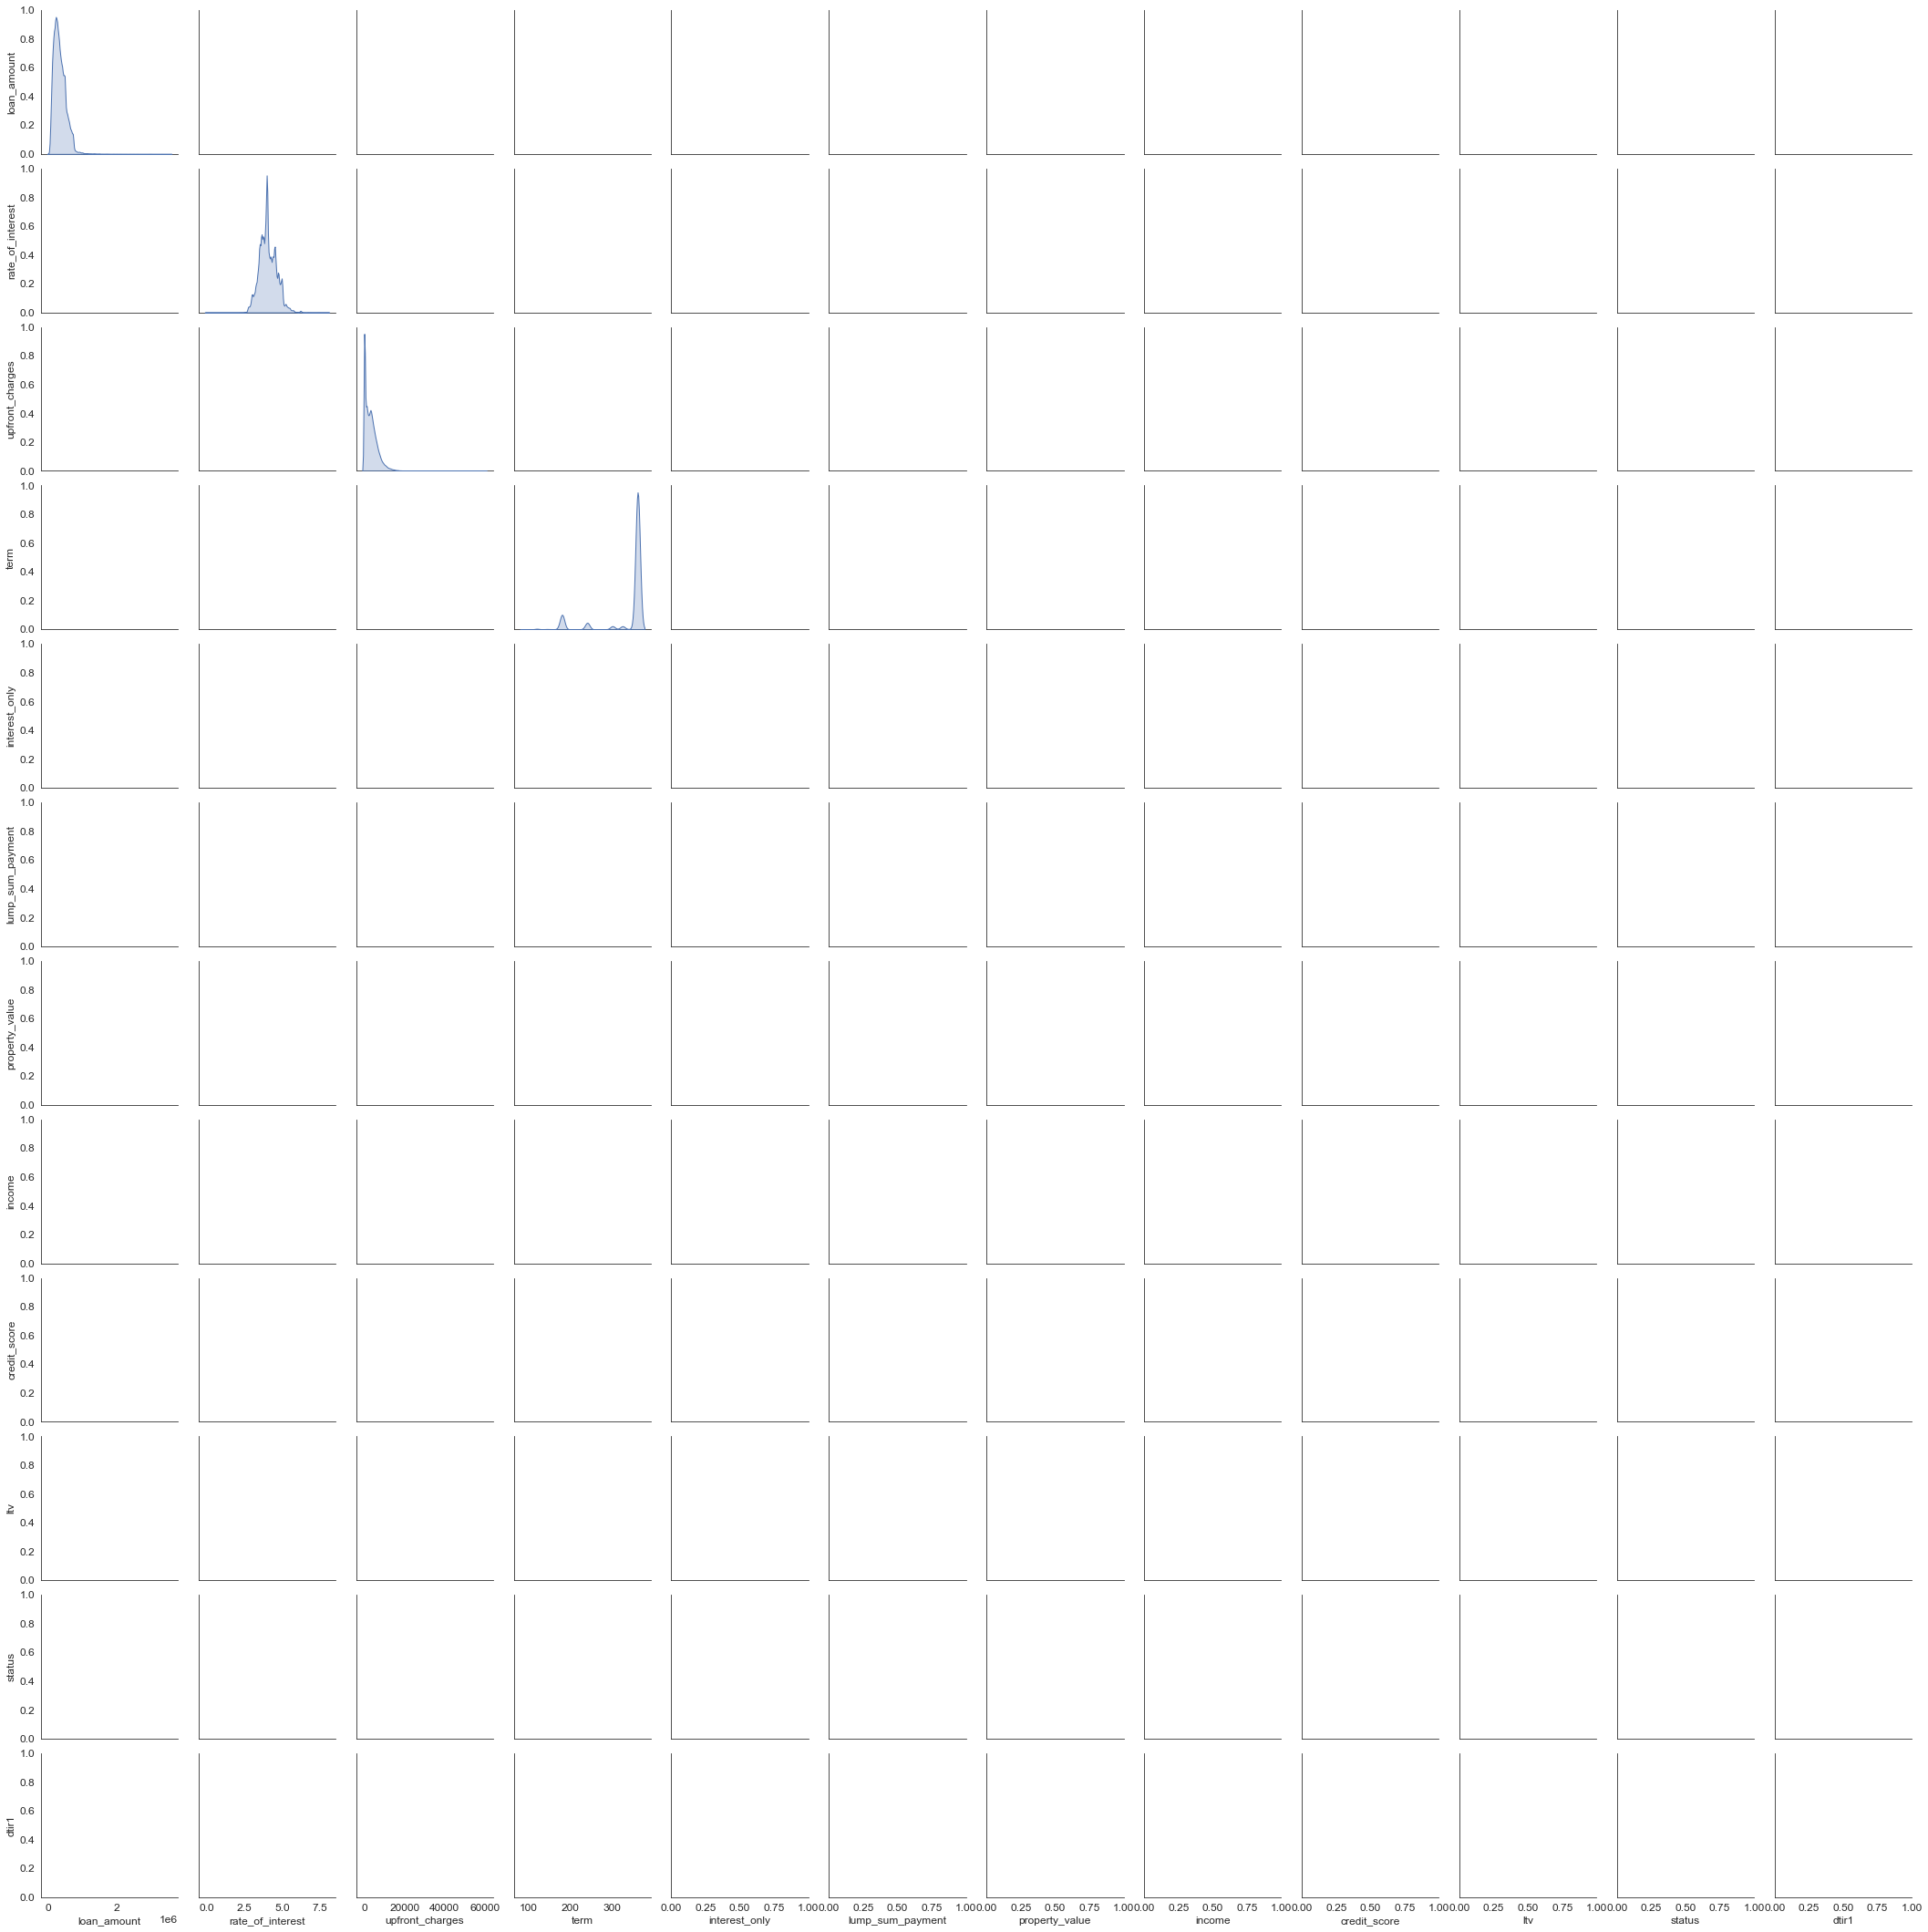

In [6]:
plotting.quick_plot(df)

### Statistics

In [ ]:
helpers.quick_eda(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   loan_limit                 145326 non-null  category
 1   gender                     148670 non-null  category
 2   approv_in_adv              147762 non-null  category
 3   loan_type                  148670 non-null  category
 4   loan_purpose               148536 non-null  category
 5   credit_worthiness          148670 non-null  category
 6   open_credit                148670 non-null  category
 7   business_or_commercial     148670 non-null  category
 8   loan_amount                148670 non-null  int64   
 9   rate_of_interest           112231 non-null  float64 
 10  upfront_charges            109028 non-null  float64 
 11  term                       148629 non-null  float64 
 12  neg_ammortization          148549 non-null  category
 13  interest_only 

,count,mean,std,min,25%,50%,75%,max
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3576500.00
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.00
upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,60000.00
term,148629.0,335.136582,58.409084,96.000000,360.00000,360.00000,360.000000,360.00
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,16508000.00
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,578580.00
credit_score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,900.00
ltv,133572.0,72.746457,39.967603,0.967478,60.47486,75.13587,86.184211,7831.25
status,148670.0,0.246445,0.430942,0.000000,0.00000,0.00000,0.000000,1.00
dtir1,124549.0,37.732932,10.545435,5.000000,31.00000,39.00000,45.000000,61.00


,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,income,credit_type,credit_score,co_applicant_credit_type,age,submission_of_application,ltv,region,status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,north,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,north,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,north,0,39.0


### Correlations

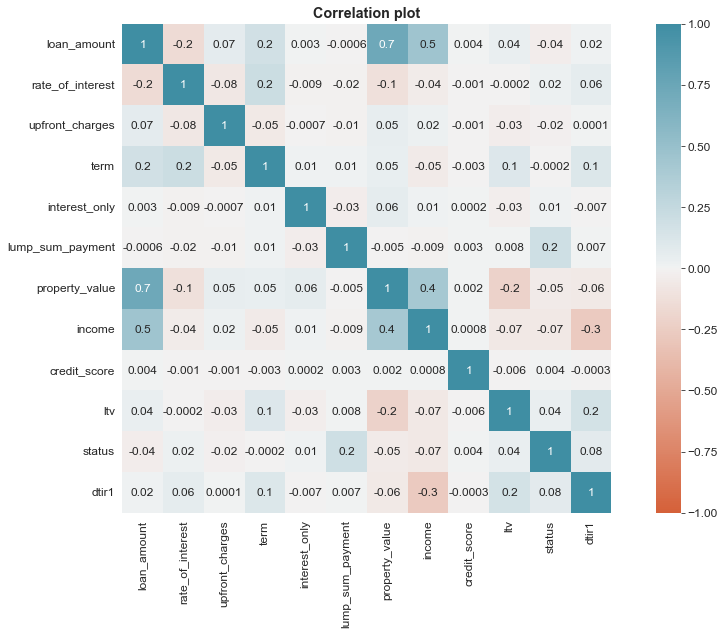

In [ ]:
plotting.plot_corr(df, rotate_xlabels=True)

### Hypotheses 

1. To drop 
    - id -> UID
    - year -> No variation 
    - interest_rate_spread -> Not able to discriminate

1. Demographics
    - Gender -> Joint less likely to default
        - Engineer whether loan was joint or not
        - Sex not provided

2. Loan types 
    - loan_type -> what is a type 2 loan? 
    - loan_limit -> missing values -> ncf tends to default more 
    - lump_sum_payment -> 
    - approv_in_adv -> NA 908
    - term -> most likely not going to be discriminating

3. Purpose 
    - loan_purpose
    - credit_worthiness
    - open_credit -> imbalanced might not be worth to compute
    - business_or_commercial -> higher chance of default if biz/comm
    - 

4. Deterministic 
    - construction_type
    

loan_limit                    3344
approv_in_adv                  908
loan_purpose                   134
rate_of_interest             36439
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
occupancy_type                   0
secured_by                       0

### Train test split

In [29]:
X = df.drop(columns=TARGET)
y = df[[TARGET]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=config.RANDOM_STATE)

In [ ]:
X_train.to_parquet(config.ROOT_DIR / 'data' / 'interim' / 'X_train.parquet')
X_test.to_parquet(config.ROOT_DIR / 'data' / 'interim' / 'X_test.parquet')
y_train.to_parquet(config.ROOT_DIR / 'data' / 'interim' / 'y_train.parquet')
y_test.to_parquet(config.ROOT_DIR / 'data' / 'interim' / 'y_test.parquet')

## KNN imputation

## Binning

In [96]:
X_train = pd.read_parquet(config.ROOT_DIR / 'data' / 'interim' / 'X_train.parquet')
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118936 entries, 41712 to 15725
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   loan_limit                 116278 non-null  category
 1   gender                     118936 non-null  category
 2   approv_in_adv              118201 non-null  category
 3   loan_type                  118936 non-null  category
 4   loan_purpose               118834 non-null  category
 5   credit_worthiness          118936 non-null  category
 6   open_credit                118936 non-null  category
 7   business_or_commercial     118936 non-null  category
 8   loan_amount                118936 non-null  int64   
 9   rate_of_interest           89851 non-null   float64 
 10  upfront_charges            87273 non-null   float64 
 11  term                       118904 non-null  float64 
 12  neg_ammortization          118840 non-null  category
 13  interest_on

1          22658
2          21420
5          21332
4          21283
3          20222
missing    12021
Name: property_value_binned, dtype: int64

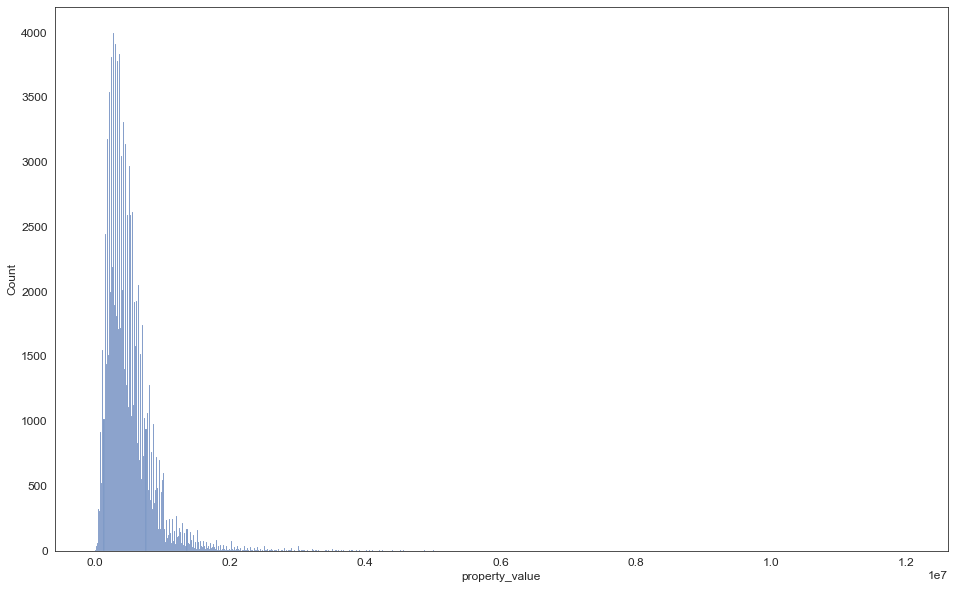

In [97]:
### property

sns.histplot(X_train['property_value'])
X_train['property_value_binned'] = pd.qcut(X_train['property_value'], q=5, 
                                labels=['1', '2', '3', '4', '5'])
X_train['property_value_binned'] = X_train['property_value_binned'].astype('object').fillna('missing')
X_train['property_value_binned'].value_counts()

41712     687
3599      811
129235    618
126625    724
73780     679
         ... 
146449    631
119906    648
17730     581
28030     801
15725     833
Name: credit_score_binned, Length: 118936, dtype: int64

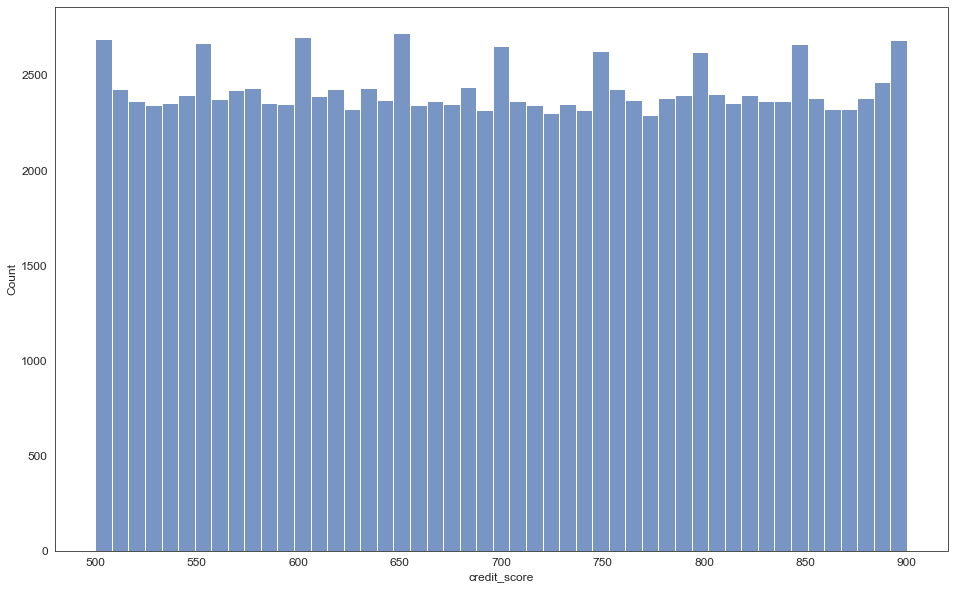

In [105]:
sns.histplot(X_train['credit_score'])

X_train['credit_score_binned'] = pd.qcut(X_train['credit_score'], q=5, 
labels=['1', '2', '3', '4', '5'])

X_train['credit_score_binned'] = X_train['credit_score'].astype('object').fillna('missing')
X_train['credit_score_binned']

1          21447
4          21427
3          21358
2          21345
5          21338
missing    12021
Name: ltv_binned, dtype: int64

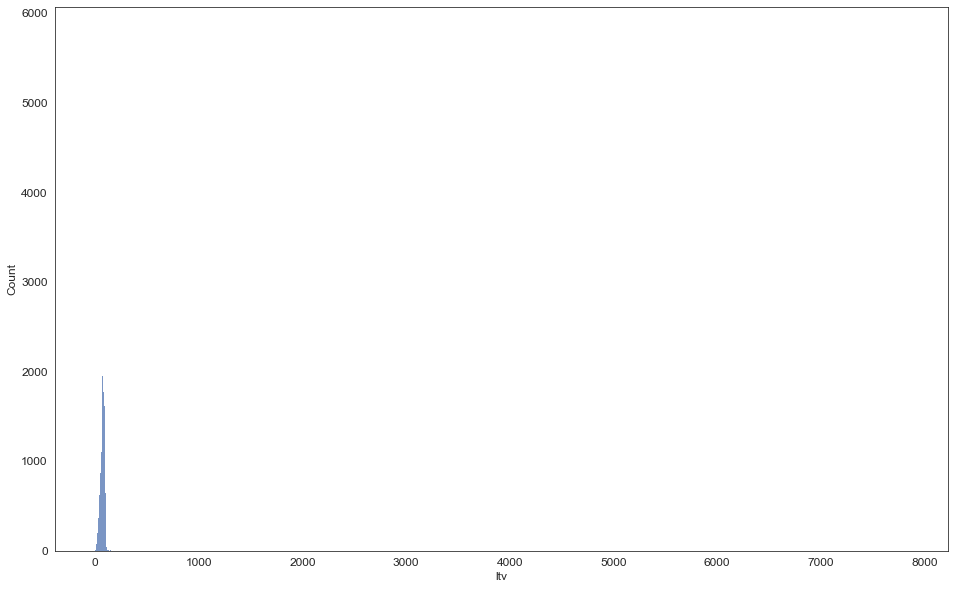

In [106]:
sns.histplot(X_train['ltv'])

X_train['ltv_binned'] = pd.qcut(X_train['ltv'], q=5, 
labels=['1', '2', '3', '4', '5'])

X_train['ltv_binned'] = X_train['ltv_binned'].astype('object').fillna('missing')

X_train['ltv_binned'].value_counts()

2          22544
1          22420
5          19418
missing    19266
3          18959
4          16329
Name: dtir1_binned, dtype: int64

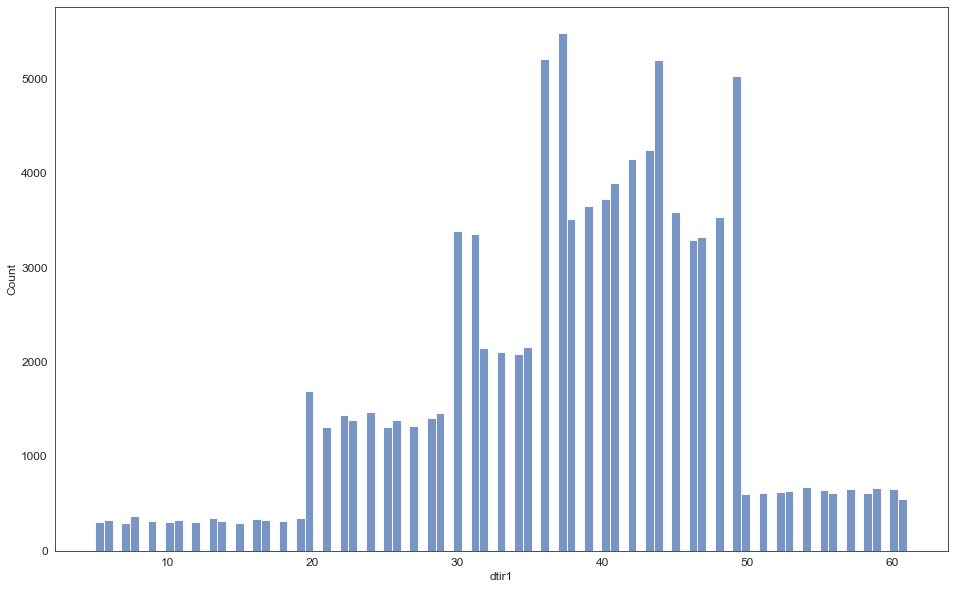

In [107]:
sns.histplot(X_train['dtir1'])

X_train['dtir1_binned'] = pd.qcut(X_train['dtir1'], q=5, 
labels=['1', '2', '3', '4', '5'])

X_train['dtir1_binned'] = X_train['dtir1_binned'].astype('object').fillna('missing')

X_train['dtir1_binned'].value_counts()

1          23098
4          22401
2          22230
5          22061
3          21795
missing     7351
Name: income_binned, dtype: int64

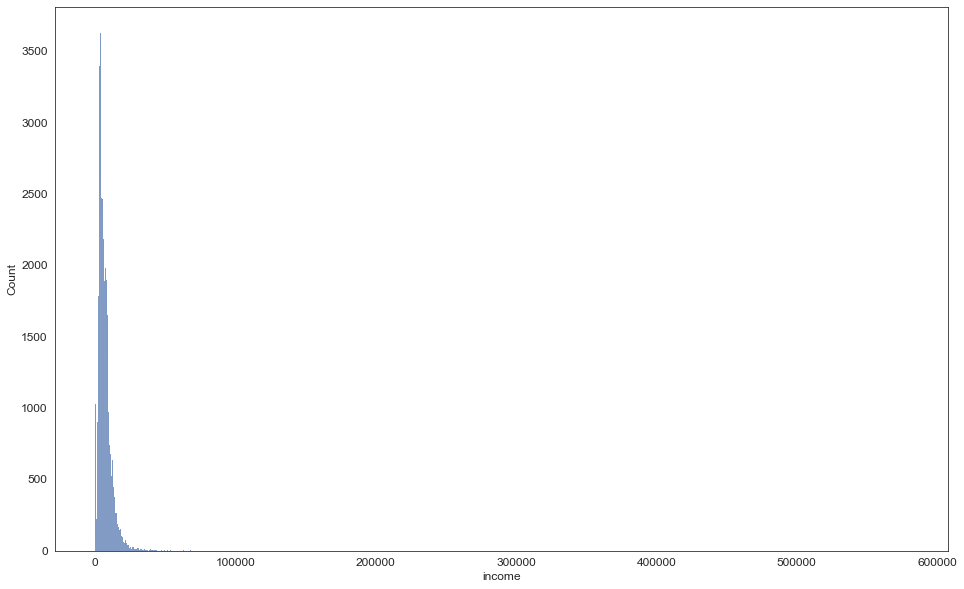

In [108]:
sns.histplot(X_train['income'])

X_train['income_binned'] = pd.qcut(X_train['income'], q=5, 
labels=['1', '2', '3', '4', '5'])

X_train['income_binned'] = X_train['income_binned'].astype('object').fillna('missing')

X_train['income_binned'].value_counts()

In [109]:
X_train.columns

Index(['dtir1', 'income', 'credit_score', 'property_value', 'ltv',
       'rate_of_interest', 'upfront_charges', 'loan_limit', 'gender',
       'approv_in_adv', 'loan_type', 'loan_purpose', 'credit_worthiness',
       'open_credit', 'business_or_commercial', 'loan_amount', 'term',
       'neg_ammortization', 'interest_only', 'lump_sum_payment',
       'occupancy_type', 'total_units', 'credit_type',
       'co_applicant_credit_type', 'age', 'submission_of_application',
       'region', 'property_value_binned', 'credit_score_binned', 'ltv_binned',
       'dtir1_binned', 'income_binned'],
      dtype='object')

In [110]:
seq = [ 'dtir1', 'income', 'credit_score', 'property_value', 'ltv','rate_of_interest', 'upfront_charges', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type', 'loan_purpose',
       'credit_worthiness', 'open_credit', 'business_or_commercial',
       'loan_amount', 'term', 'neg_ammortization', 'interest_only', 'lump_sum_payment',
       'occupancy_type', 'total_units', 
       'credit_type', 'co_applicant_credit_type', 'age',
       'submission_of_application', 'region',
       'property_value_binned', 'credit_score_binned', 'ltv_binned']

In [111]:
X_train = X_train.reindex(columns=seq)

<AxesSubplot:>

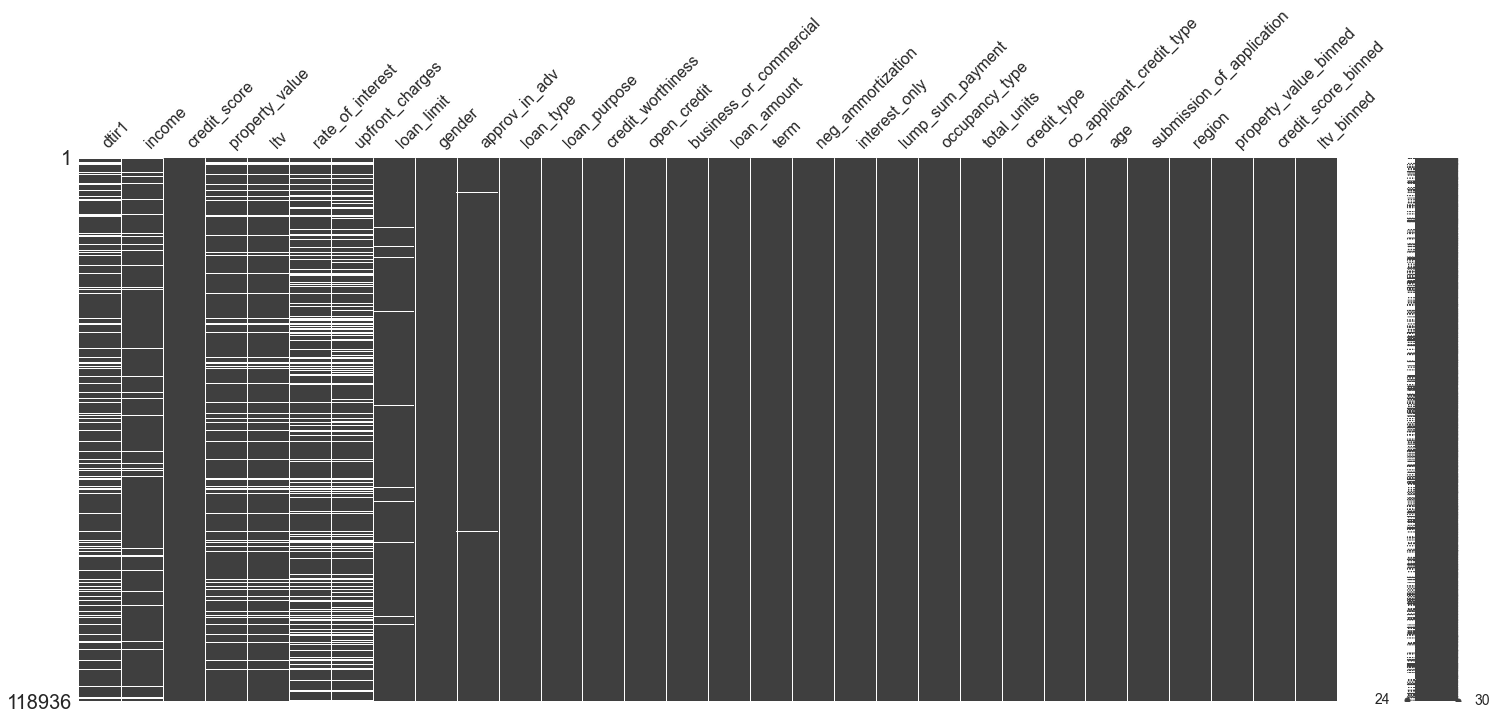

In [112]:
msno.matrix(X_train)

In [77]:
X_train.loc[X_train['credit_score_binned'] == 'missing']

,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_score,co_applicant_credit_type,age,submission_of_application,ltv,region,dtir1,ms,property_value_binned,credit_score_binned


In [57]:
from sklearn.impute import KNNImputer

<AxesSubplot:>

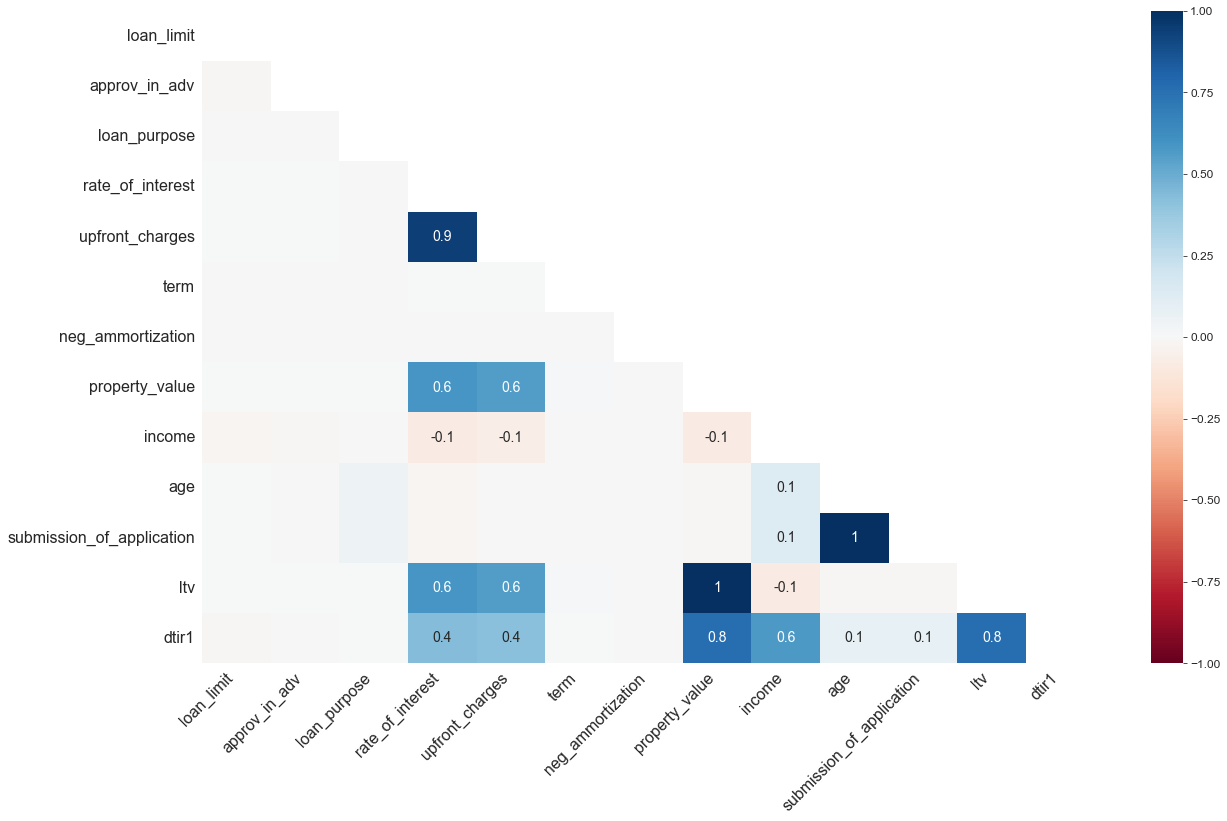

In [44]:
msno.heatmap(X_train)

## Baseline 

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier() 


pp = Pipeline([
        ('ohe', OneHotEncoder()),
        ('rfc', rfc)
     ])

pp.fit(X_train, y_train)


ValueError: Found unknown categories [1836500, 1916500, 2086500, 2126500, 2186500, 2206500, 2226500, 2396500, 2476500, 2606500, 3576500] in column 8 during transform